### Funkcja obliczająca iloczyn skalarny dwóch wektorów

In [42]:
using LinearAlgebra
function vector_vector(n)
    a = rand(n)
    b = rand(n)
    return a ⋅ b
end

vector_vector (generic function with 1 method)

### Funkcja obliczająca mnożenie macierzy kwadratowej przez wektor

In [43]:
function matrix_vector(n)
    v = rand(n)
    m = rand(n,n)
    return m * v
end

matrix_vector (generic function with 1 method)

### Pomiar czasu działania obydwu funkcji dwa różnych rozmiarów wektorów

In [44]:
using DataFrames

# rozmiary wektorów
vector_sizes = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
matrix_sizes = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]

# liczba pomiarów każdego wariantu
repeat = 10 
results = DataFrame(type=[], size=[], time=[])

for i in vector_sizes
    for j in 1:repeat
        push!(results, ["vector-vector", i, @elapsed vector_vector(i)])
    end
end

for i in matrix_sizes
    for j in 1:repeat
        push!(results, ["matrix-vector", i, @elapsed matrix_vector(i)])
    end
end

using CSV
using DataFrames
CSV.write("results.csv", results)

"results.csv"

### Wczytanie wyników z results.csv do DataFrame

In [45]:
input = "results.csv"
mydata = CSV.read(input, DataFrame)

Row,type,size,time
,String15,Int64,Float64
1,vector-vector,10000,0.00652294
2,vector-vector,10000,1.9067e-5
3,vector-vector,10000,1.7531e-5
4,vector-vector,10000,1.8648e-5
5,vector-vector,10000,1.767e-5
6,vector-vector,10000,1.8019e-5
7,vector-vector,10000,1.8228e-5
8,vector-vector,10000,1.767e-5
9,vector-vector,10000,1.746e-5


### Wykres zależności średniego czasu operacji w zależności od rozmiaru wektora - iloczyn skalarny

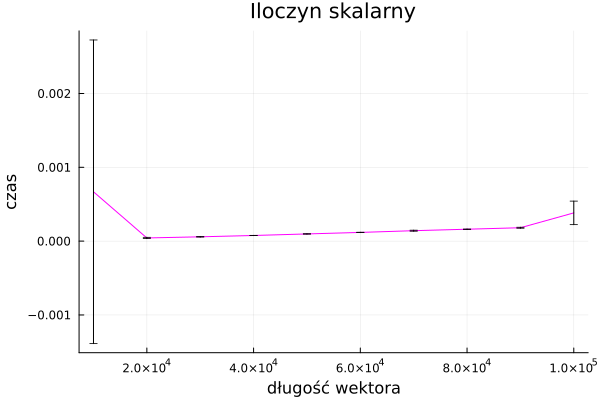

In [46]:
using Statistics
data_vector, data_matrix = groupby(mydata, [:type])
vector_grouped = groupby(data_vector, :size)
result_vector = combine(vector_grouped, "time" => (x -> (mean=mean(x), std=std(x))) => [:mean, :std])

using Plots
p1 = plot(result_vector.size, result_vector.mean, yerr=result_vector.std, label = "",
    title="Iloczyn skalarny", color = :magenta, xlabel = "długość wektora", ylabel = "czas")

### Wykres zależności średniego czasu operacji w zależności od rozmiaru wektora - mnożenie macierzy przez wektor

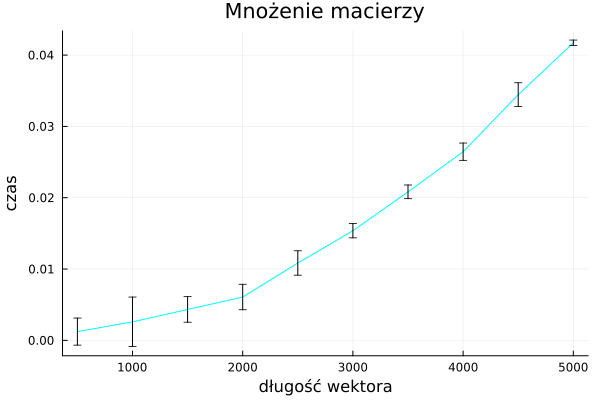

In [47]:
matrix_grouped = groupby(data_matrix, :size)
result_matrix = combine(matrix_grouped, "time" => (x -> (mean=mean(x), std=std(x))) => [:mean, :std])

p2 = plot(result_matrix.size, result_matrix.mean, yerr=result_matrix.std, 
    title="Mnożenie macierzy", color = :cyan, xlabel = "długość wektora", ylabel = "czas",
    label = "")

### Oba wykresy we wspólnej tabeli

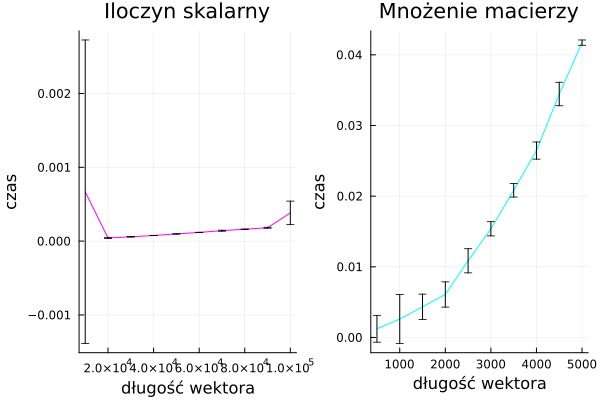

In [48]:
plot(p1, p2, layout = 2)